In [ ]:
#install.packages("ggplot2")
#install.packages("dplyr")

In [ ]:
#install.packages("repr")

In [1]:
library(repr)

In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
#Data upload and very first exploration
data.friday <- read.csv("BlackFriday.csv", header=TRUE, na.strings = "NA")
str(data.friday)
summary(data.friday)

'data.frame':	537577 obs. of  12 variables:
 $ User_ID                   : int  1000001 1000001 1000001 1000001 1000002 1000003 1000004 1000004 1000004 1000005 ...
 $ Product_ID                : Factor w/ 3623 levels "P00000142","P00000242",..: 671 2375 851 827 2733 1830 1744 3319 3597 2630 ...
 $ Gender                    : Factor w/ 2 levels "F","M": 1 1 1 1 2 2 2 2 2 2 ...
 $ Age                       : Factor w/ 7 levels "0-17","18-25",..: 1 1 1 1 7 3 5 5 5 3 ...
 $ Occupation                : int  10 10 10 10 16 15 7 7 7 20 ...
 $ City_Category             : Factor w/ 3 levels "A","B","C": 1 1 1 1 3 1 2 2 2 1 ...
 $ Stay_In_Current_City_Years: Factor w/ 5 levels "0","1","2","3",..: 3 3 3 3 5 4 3 3 3 2 ...
 $ Marital_Status            : int  0 0 0 0 0 0 1 1 1 1 ...
 $ Product_Category_1        : int  3 1 12 12 8 1 1 1 1 8 ...
 $ Product_Category_2        : int  NA 6 NA 14 NA 2 8 15 16 NA ...
 $ Product_Category_3        : int  NA 14 NA NA NA NA 17 NA NA NA ...
 $ Purchase          

    User_ID            Product_ID     Gender        Age        
 Min.   :1000001   P00265242:  1858   F:132197   0-17 : 14707  
 1st Qu.:1001495   P00110742:  1591   M:405380   18-25: 97634  
 Median :1003031   P00025442:  1586              26-35:214690  
 Mean   :1002992   P00112142:  1539              36-45:107499  
 3rd Qu.:1004417   P00057642:  1430              46-50: 44526  
 Max.   :1006040   P00184942:  1424              51-55: 37618  
                   (Other)  :528149              55+  : 20903  
   Occupation     City_Category Stay_In_Current_City_Years Marital_Status  
 Min.   : 0.000   A:144638      0 : 72725                  Min.   :0.0000  
 1st Qu.: 2.000   B:226493      1 :189192                  1st Qu.:0.0000  
 Median : 7.000   C:166446      2 : 99459                  Median :0.0000  
 Mean   : 8.083                 3 : 93312                  Mean   :0.4088  
 3rd Qu.:14.000                 4+: 82889                  3rd Qu.:1.0000  
 Max.   :20.000                 

In [4]:
#grouping by User_ID and summing the purchases for each user
tmp <- aggregate(Purchase ~ User_ID, data= data.friday, sum ) ##COUNTS NUMBER OF PURCHASES
names(tmp) <- c("User_ID", "purchase_count")


purchase_count <- tmp[,2]
friday.users <- merge(tmp, data.friday, by = "User_ID", all.y = FALSE)
friday.users <- cbind(distinct(data.friday, User_ID, Age, Gender, Marital_Status, Occupation,
                         City_Category, Stay_In_Current_City_Years), purchase_count)

head(friday.users)

User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,purchase_count
1000001,F,0-17,10,A,2,0,333481
1000002,M,55+,16,C,4+,0,810353
1000003,M,26-35,15,A,3,0,341635
1000004,M,46-50,7,B,2,1,205987
1000005,M,26-35,20,A,1,1,821001
1000006,F,51-55,9,A,1,0,379450


In [5]:
attach(friday.users)

The following objects are masked _by_ .GlobalEnv:

    Gender, purchase_count



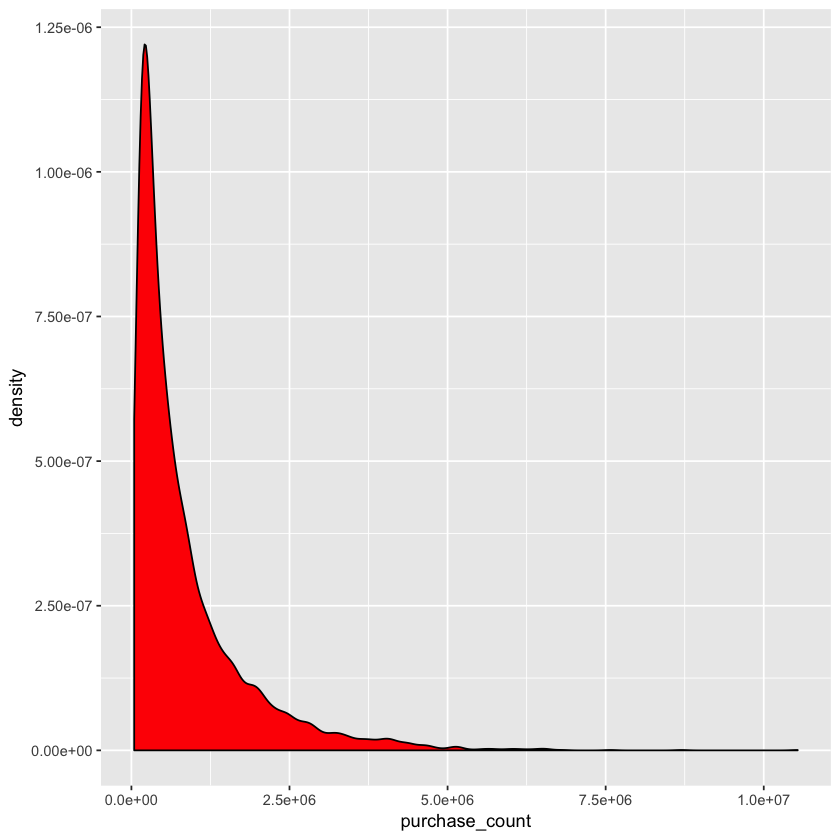

In [6]:
#Looking at the density plot of purchases
purchase.plot <- ggplot(friday.users, aes(x = purchase_count)) + 
  geom_density(fill="red", col="black")
purchase.plot

Data anlysis with total number of users and total purchase

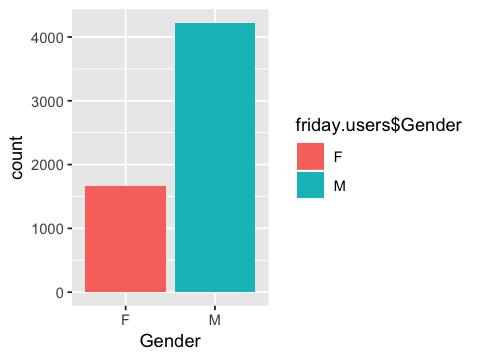

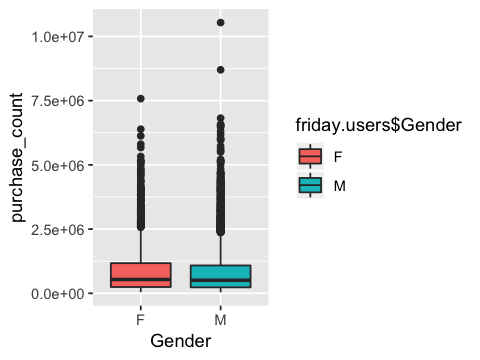

In [8]:
options(repr.plot.width=4, repr.plot.height=3)
Gender <- as.factor(ifelse(Gender == "M" , "Male" ,"Female"))
gender.boxplot <- ggplot(friday.users, aes(x=Gender, fill = friday.users$Gender)) + 
            geom_boxplot(aes( y = purchase_count))
gender.plot <- ggplot(friday.users, aes(x=Gender, fill = friday.users$Gender)) + geom_bar()
par(mfrow=c(1,2), las= 1)
gender.plot
gender.boxplot

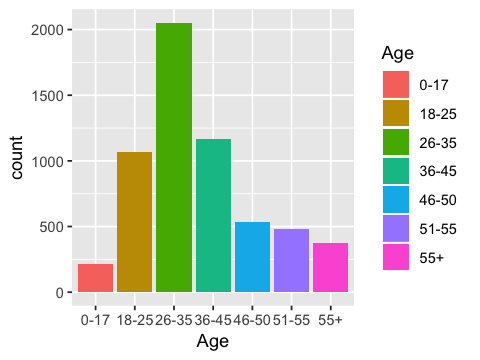

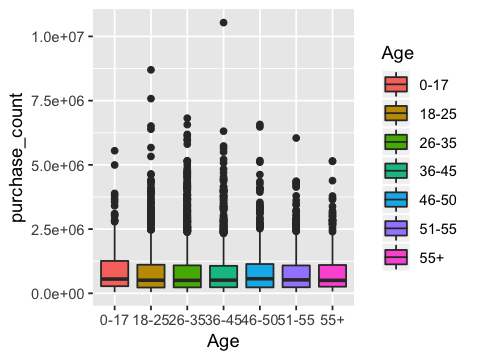

In [9]:
age.plot <- ggplot(friday.users, aes(Age, fill = Age)) + geom_bar()
age.boxplot <- ggplot(friday.users, aes(Age, fill = Age)) +
          geom_boxplot(aes( y = purchase_count))
age.plot
age.boxplot

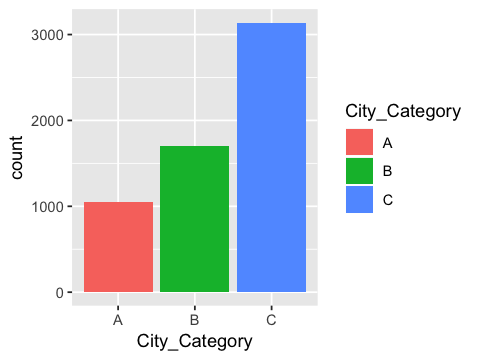

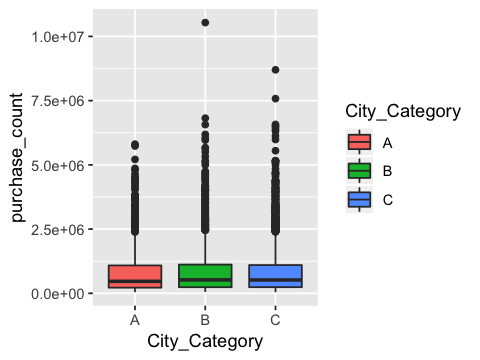

In [10]:
city.plot <- ggplot(friday.users, aes(City_Category, fill = City_Category)) + geom_bar()
city.boxplot <- ggplot(friday.users, aes(City_Category, fill = City_Category)) +
            geom_boxplot(aes( y = purchase_count))
city.plot
city.boxplot

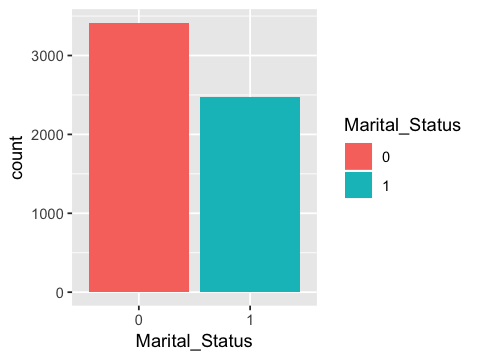

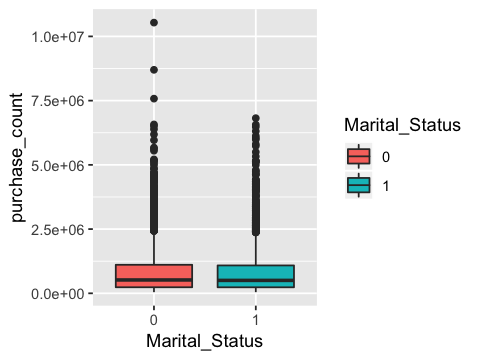

In [11]:
friday.users$Marital_Status <- as.factor(friday.users$Marital_Status)
married.plot <- ggplot(friday.users, aes(Marital_Status, fill = Marital_Status)) + geom_bar()
married.boxplot <- ggplot(friday.users, aes(Marital_Status, fill = Marital_Status)) +
           geom_boxplot(aes( y = purchase_count))
married.plot
married.boxplot

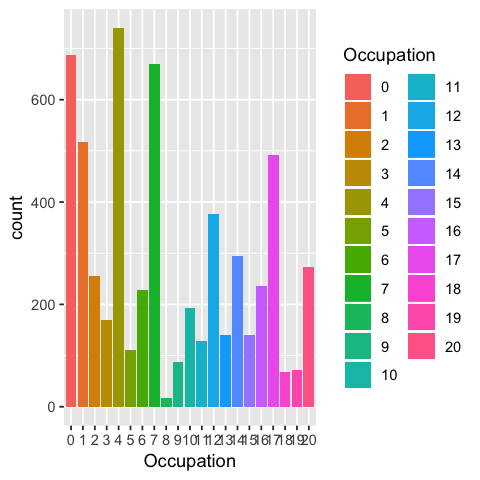

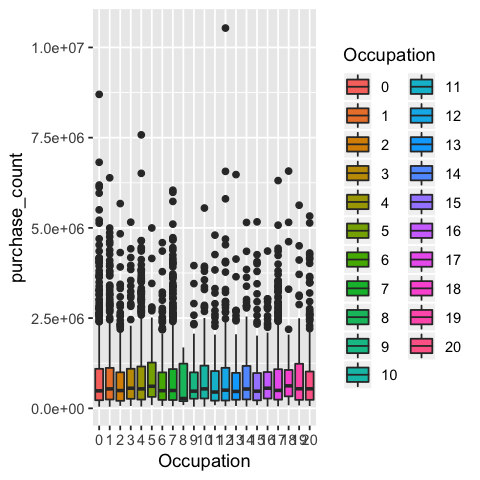

In [16]:
options(repr.plot.width=4, repr.plot.height=4)
friday.users$Occupation  <- as.factor(friday.users$Occupation)
job.plot <- ggplot(friday.users, aes(Occupation, fill = Occupation)) + geom_bar()
job.boxplot <- ggplot(friday.users, aes(Occupation, fill = Occupation)) +
        geom_boxplot(aes( y = purchase_count))
job.plot
job.boxplot

Machine learning analysis with the h2o package.

I am going to use only the random forest technique. First thing I did was to divide the interval in two groups, one for training and one for testing; then I calculated the percentual error on prediction getting an accuracy of 70% (30% of error). However this is actually USELESS considering the OOB error and the option "nfolds" which automatically performs a cross-validation. Therefore I simply turned this option on to get what will be the final results. Discussion on the results is found below.

In [13]:
library(h2o)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’

The following objects are masked from ‘package:stats’:

    cor, sd, var

The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc



In [37]:
h2o.init(max_mem_size="5g") #5 giga of memory for h2o


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /var/folders/gf/wblv8qyd1jg2gwgv4b3vpfjw0000gn/T//RtmpATKsw8/h2o_nicolameneghini_started_from_r.out
    /var/folders/gf/wblv8qyd1jg2gwgv4b3vpfjw0000gn/T//RtmpATKsw8/h2o_nicolameneghini_started_from_r.err


Starting H2O JVM and connecting: .. Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 seconds 476 milliseconds 
    H2O cluster timezone:       Europe/Rome 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.20.0.8 
    H2O cluster version age:    3 months and 18 days !!! 
    H2O cluster name:           H2O_started_from_R_nicolameneghini_kaf855 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   5.00 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O 

Warning message in h2o.clusterInfo():
“
Your H2O cluster version is too old (3 months and 18 days)!
Please download and install the latest version from http://h2o.ai/download/”

I need to make all the variable categorical

In [57]:
data.friday$Occupation <- as.factor(data.friday$Occupation)
data.friday$User_ID <- as.factor(data.friday$User_ID)
data.friday$Marital_Status <- as.factor(data.friday$Marital_Status)
data.friday$Product_Category_1 <- as.factor(data.friday$Product_Category_1)
data.friday$Product_Category_2 <- as.factor(data.friday$Product_Category_2)
data.friday$Product_Category_3 <- as.factor(data.friday$Product_Category_3)
data.friday <- data.friday[,-c(2)]
head(data.friday)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,F,0-17,10,A,2,0,3,NA,NA,8370
4,1000001,F,0-17,10,A,2,0,12,14,NA,1057
5,1000002,M,55+,16,C,4+,0,8,NA,NA,7969
6,1000003,M,26-35,15,A,3,0,1,2,NA,15227
7,1000004,M,46-50,7,B,2,1,1,8,17,19215
8,1000004,M,46-50,7,B,2,1,1,15,NA,15854


In [58]:
len <-length(data.friday$User_ID)/5 
len1 <- length(data.friday$User_ID)
test <- data.friday[1:len,]
train <- data.friday[len:len1,]

In [59]:
train.hex <- as.h2o(train) ###IMPORTANT: THIS IS HOW I MAKE AN H2O-FRAME (THERE'S ANOTHER WAY, BUT IT'S LONGER)

  |======================================================================| 100%


In [60]:
model.forest <- h2o.randomForest( y= "Purchase", training_frame= train.hex,nfolds=0, ntrees = 20, max_depth = 20)

  |======================================================================| 100%


In [61]:
summary(model.forest)

Model Details:

H2ORegressionModel: drf
Model Key:  DRF_model_R_1546967293711_2 
Model Summary: 
  number_of_trees number_of_internal_trees model_size_in_bytes min_depth
1              20                       20            15470355        20
  max_depth mean_depth min_leaves max_leaves mean_leaves
1        20   20.00000      36994      46518 42306.90000

H2ORegressionMetrics: drf
** Reported on training data. **
** Metrics reported on Out-Of-Bag training samples **

MSE:  8383535
RMSE:  2895.433
MAE:  2155.456
RMSLE:  0.371808
Mean Residual Deviance :  8383535





Scoring History: 
            timestamp   duration number_of_trees training_rmse training_mae
1 2019-01-08 18:33:15  0.002 sec               0            NA           NA
2 2019-01-08 18:33:17  2.828 sec               1    3183.91957   2304.26240
3 2019-01-08 18:33:22  7.688 sec               3    3142.26258   2289.67739
4 2019-01-08 18:33:27 12.726 sec               6    3043.34919   2235.89324
5 2019-01-08 18:33:33 18.035 

In [75]:
test.hex <-as.h2o(test)
pred <- h2o.predict(model.forest, test.hex)

  |======================================================================| 100%
  |======================================================================| 100%


In [79]:
head(pred,6)

predict
11437.493
1732.588
8084.803
15872.255
18810.939
14786.069


In [80]:
head(test.hex,6)

User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1000001,F,0-17,10,A,2,0,3,NA,NA,8370
1000001,F,0-17,10,A,2,0,12,14,NA,1057
1000002,M,55+,16,C,4+,0,8,NA,NA,7969
1000003,M,26-35,15,A,3,0,1,2,NA,15227
1000004,M,46-50,7,B,2,1,1,8,17,19215
1000004,M,46-50,7,B,2,1,1,15,NA,15854


In [84]:
errore <- abs((pred-test.hex$Purchase)/test.hex$Purchase)

In [85]:
head(errore)

abs(predict)
0.36648663
0.63915625
0.01453170
0.04237574
0.02102843
0.06736036


In [89]:
summary(errore)

Warning message in summary.H2OFrame(errore):
“Approximated quantiles computed! If you are interested in exact quantiles, please pass the `exact_quantiles=TRUE` parameter.”

 abs(predict)       
 Min.   :4.631e-06  
 1st Qu.:9.460e-02  
 Median :1.824e-01  
 Mean   :3.297e-01  
 3rd Qu.:2.973e-01  
 Max.   :6.757e+00  

THIS IS WHERE THE "FINAL" MODEL STARTS

In [91]:
black.hex<-as.h2o(data.friday)

  |======================================================================| 100%


In [92]:
model <- h2o.randomForest( y= "Purchase", training_frame= black.hex, nfolds=8, ntrees = 40, max_depth = 25,
                               stopping_metric="misclassification",seed = 1)

Warning message in .h2o.startModelJob(algo, params, h2oRestApiVersion):
“Stopping metric is ignored for _stopping_rounds=0..
”

  |======================================================================| 100%


In [95]:
summary(model)

Model Details:

H2ORegressionModel: drf
Model Key:  DRF_model_R_1546967293711_3 
Model Summary: 
  number_of_trees number_of_internal_trees model_size_in_bytes min_depth
1              40                       40            62821323        25
  max_depth mean_depth min_leaves max_leaves mean_leaves
1        25   25.00000      71906      86298 77762.42000

H2ORegressionMetrics: drf
** Reported on training data. **
** Metrics reported on Out-Of-Bag training samples **

MSE:  8219977
RMSE:  2867.05
MAE:  2125.482
RMSLE:  0.3679959
Mean Residual Deviance :  8219977



H2ORegressionMetrics: drf
** Reported on cross-validation data. **
** 8-fold cross-validation on training data (Metrics computed for combined holdout predictions) **

MSE:  8115884
RMSE:  2848.839
MAE:  2113.489
RMSLE:  0.3657813
Mean Residual Deviance :  8115884


Cross-Validation Metrics Summary: 
                             mean           sd cv_1_valid cv_2_valid cv_3_valid
mae                      2113.491    5.9805627  

The OOB RMSE (around 2800) is actually the same as all the cross-validation RMSE, meaning that all the training subsets carry the same information. Also, I tried to change considerably the number of trees getting:

trees = 20, depth = 20 --> RMSE = 2900 //DA RIFARE PERCHÈ AVEVO OTTENUTO QUESTO ERRORE CON ANCHE PRODUCT_ID CHE POI HO TOLTO

trees = 40, depth = 25 --> RMSE = 2800

Which means that neither of these parameter signifcantly influence the result.

One more thing to note is the variable importance: the ranking is expected as it is compatible with the anova tests.
The only one which is not is gender, but it does not come as a surprise with a little bit of common sense. The fact that the anova test gave another result is only due to the greater number of males taken into consideration for creating the data-set